In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [40]:

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

df.head()

,account number,Name,sku,Purchases,unit price,Sales,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [16]:
#? df
? df.head

## Let's do some calculations

Let's get the total number of purchases and sales for the top 10 customers

In [42]:
group_by_name = df.groupby('Name')
group_by_name

In [43]:
group_by_name.mean()

,account number,Purchases,unit price,Sales
Name,,,,
Barton LLC,740150.0,24.890244,53.769024,1334.615854
"Cronin, Oberbrunner and Spencer",257198.0,24.970149,49.805821,1339.321642
"Frami, Hills and Schmidt",786968.0,26.430556,54.756806,1438.466528
"Fritsch, Russel and Anderson",737550.0,26.074074,53.708765,1385.366790
"Halvorson, Crona and Champlin",604255.0,22.137931,55.946897,1206.971724
Herman LLC,141962.0,24.806452,52.566935,1336.532258
Jerde-Hilpert,412290.0,22.460674,52.084719,1265.072247
"Kassulke, Ondricka and Metz",307599.0,25.734375,51.043125,1350.797969
Keeling LLC,688981.0,24.405405,57.076081,1363.977027


In [46]:
df.groupby('Name')[['Sales', 'Purchases']]

In [49]:
df.groupby('Name')[['Sales', 'Purchases']].agg({'Sales': 'sum', 'Purchases': 'count'})

,Sales,Purchases
Name,,
Barton LLC,109438.50,82
"Cronin, Oberbrunner and Spencer",89734.55,67
"Frami, Hills and Schmidt",103569.59,72
"Fritsch, Russel and Anderson",112214.71,81
"Halvorson, Crona and Champlin",70004.36,58
Herman LLC,82865.00,62
Jerde-Hilpert,112591.43,89
"Kassulke, Ondricka and Metz",86451.07,64
Keeling LLC,100934.30,74


In [53]:
top_10 = (df.groupby('Name')[['Sales', 'Purchases']].agg({'Sales': 'sum', 'Purchases': 'count'}).sort_values(by='Sales', ascending=False))[:10].reset_index()


In [54]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


## Let's plot

In [59]:
#plt.style.available
plt.style.use('ggplot')


<AxesSubplot:ylabel='Name'>

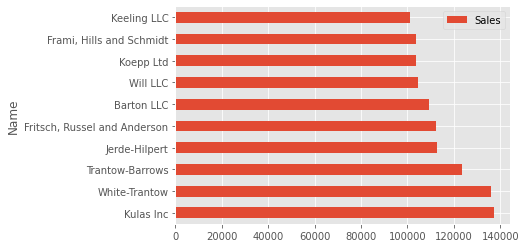

In [60]:
top_10.plot(kind='barh', y="Sales", x="Name")


## Let's do some plotting customizations


<AxesSubplot:ylabel='Name'>

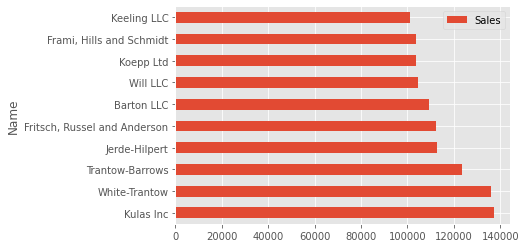

In [61]:
fig, ax = plt.subplots()
# remember : fig is the final figure, and axes is are the individual subplots
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Customer')]

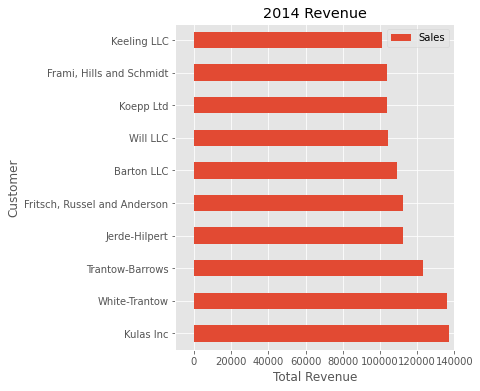

In [65]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')


In [68]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

formatter = FuncFormatter(currency)



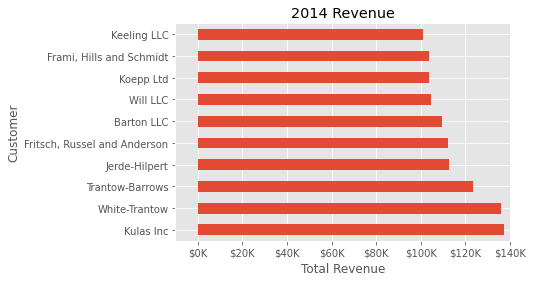

In [69]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
# Set a formatter on the X-axis
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)


## Let's insert some extras

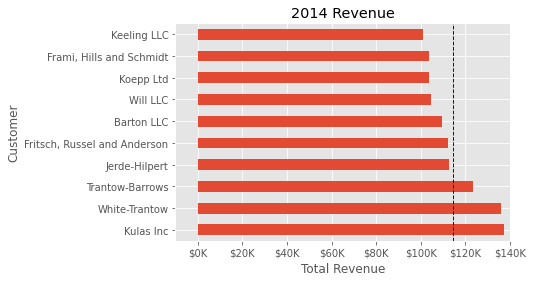

In [71]:
fig, ax = plt.subplots()


# Add a line for the average
avg = top_10['Sales'].mean()
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)




# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
# Set a formatter on the X-axis
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)


## Multiple Plots

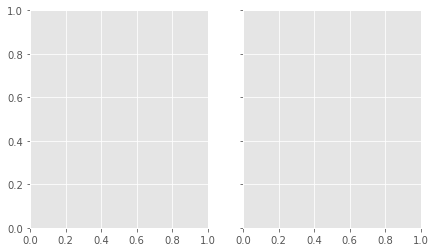

In [72]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))


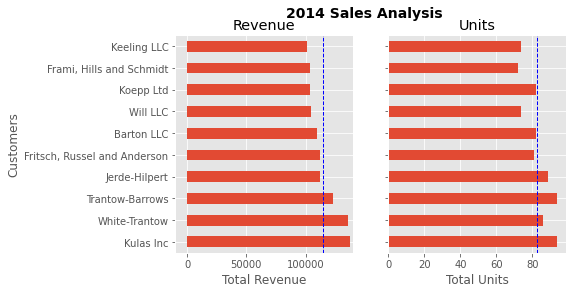

In [74]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')



# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

## References

### Matplotlib tutorials : https://matplotlib.org/stable/tutorials/index.html
### Practical Business Python : https://pbpython.com/effective-matplotlib.html